## Project: Predicting Customer Churn of Bank ABC

* Below is the customer data of account holders at a Multinational Bank and the aim of the model will be to predict the Customer Churn to hold their customers for sustaining their business.



|Column   | used variable  |  Description |
|---|---|---|
| customer_id  |  no |Account number   |
|credit_score|yes   |  Credit Score |
|  country | yes   | Country of Residence   |
| gender  |  yes | Female/Male  |
|age|yes   |  Age of the client |
|tenure|yes   | How many years the client having a bank account at ABC Bank  |
| balance |  yes | Account balance of the client  |
| product_number  |  yes | Number of products from the bank  |
|credit_card|yes   |   Does the client have a credit card|
|active_member|yes   | Is the customer an active member of the bank  |
|  estimated_salary | yes  | How much is the estimated salary of the customer  |  
|  churn | yes  |  Boolean: 1 if the client has left the bank or 0 if the client is still with the bank  |  





In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# processing libraries 
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [3]:
df = pd.read_csv('customer_churn.csv')
df.sample(50)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
8907,15710671,786,France,Male,34,3,137361.96,1,0,0,183682.09,0
5591,15607509,539,France,Male,38,5,0.00,2,1,0,47388.41,0
5961,15762993,796,Spain,Male,32,5,102773.15,2,0,1,117832.88,0
8712,15771054,469,Spain,Male,35,5,0.00,2,1,0,186490.37,0
2746,15655794,620,France,Male,36,8,0.00,2,1,1,145937.99,0
2304,15680141,759,Spain,Female,35,7,147936.42,1,1,1,106785.70,0
4245,15569446,732,France,Female,34,8,122338.43,2,1,0,187985.85,0
3806,15740383,594,Spain,Female,38,10,0.00,2,1,0,58332.91,0
7416,15592326,583,France,Male,36,8,0.00,2,0,1,5571.59,0
9150,15602030,717,France,Male,28,4,128206.79,1,1,1,54272.12,0


# Data Exploration

In [5]:
df.drop("customer_id", axis="columns", inplace=True) #inplace true will directly update the dataframe
df.dtypes #to check all datatypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [6]:
# Count the number of missing values in each column
print(df.isnull().sum())

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [7]:
df.country.values #to be converted to number representation

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

In [8]:
df.estimated_salary.values  #to be converted to number representation

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [9]:
df.head(4).style.set_properties(**{"background-color": "greywhite","color": "black", "border-color": "black", "font-size":"9pt", 'width': 200})

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0


In [10]:
df.describe().style.set_properties(**{"background-color": "#greywhite","color": "black", "border-color": "black", "font-size":"8pt", 'width': 200})

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Visualization

* Check: How many loyal customers are leaving the bank?

In [13]:
df[df.churn==0]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


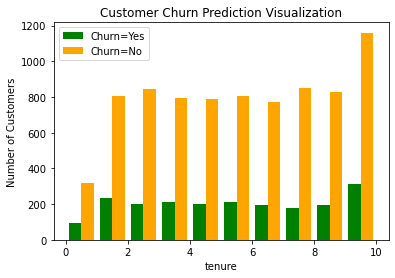

In [14]:
tenure_churn_no = df[df.churn==0].tenure #defining two new variables
tenure_churn_yes = df[df.churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color =["green", "orange"], label=["Churn=Yes", "Churn=No"])
plt.legend()

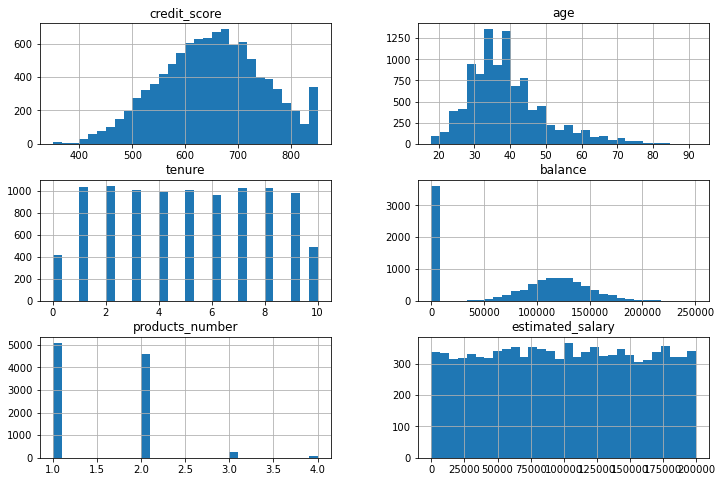

In [15]:
# Visualize the distribution of numeric features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
df[numeric_features].hist(bins=30, figsize=(12, 8))
plt.show()

The longer the customer is with the bank, the more he remains with the bank (around 1200 are not leaving the bank after 10 years staying with the bank, around 300 are leaving)

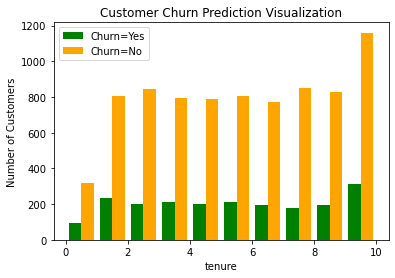

In [17]:
tenure_churn_no = df[df.churn==0].tenure #defining two new variables
tenure_churn_yes = df[df.churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color =["green", "orange"], label=["Churn=Yes", "Churn=No"])
plt.legend()

In [18]:
def print_unique_col_value(df):
    for column in df: 
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}') #prints unique values in each column 

In [19]:
print_unique_col_value(df)

country : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']


Data cleaning: If you want to replace a column use: df.replace("No X", "No", inplace=True)
replace yes no with number:

yes_no_column = ["Partner", "Churn"]

for col in yes_no_column:
    df[col].replace({"Yes":1, "No": 0, inplace= True})

In [21]:
#replace: gender in numerical representation: Female:1 and Male: 0

df["gender"].replace({"Female":1, "Male":0}, inplace=True)

In [22]:
df["gender"].unique()

array([1, 0])

In [23]:
#One Hot Encoding: Creates 3 columns

df=pd.get_dummies(df, columns=["country"])
df.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')

In [24]:
df.sample(4) #3 new columns for 3 countries were created: Germany, France and Spain

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
5083,653,1,38,9,149571.94,1,1,0,118383.18,0,0,0,1
9796,642,0,22,10,111812.52,2,1,1,183045.46,0,0,1,0
8694,671,1,48,9,116711.06,2,0,0,76373.38,0,0,1,0
8736,636,0,44,2,0.00,2,0,0,86414.41,0,1,0,0


In [25]:
#Scale balance,estimated_salary, tenure to come to 0 and 1 range

cols_to_scale = ["tenure","balance", "estimated_salary", "credit_score"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]) 


In [26]:
df.sample(5)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
3040,0.732,0,38,0.4,0.000000,2,1,0,0.948426,0,1,0,0
7715,0.334,0,62,0.1,0.174464,3,1,0,0.938813,1,1,0,0
1088,1.000,0,22,0.2,0.000000,2,1,1,0.048369,0,0,0,1
408,0.636,0,37,1.0,0.609643,2,1,1,0.797946,0,0,1,0
5578,0.674,1,50,0.5,0.000000,2,1,0,0.551147,0,0,0,1


In [27]:
for col in df:
        print(f'{col}: {df[col].unique()}')

credit_score: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [28]:
df.dtypes #to check all datatypes

credit_score        float64
gender                int64
age                   int64
tenure              float64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_France        uint8
country_Germany       uint8
country_Spain         uint8
dtype: object

In [29]:
df1 = df.drop("age", axis="columns")
df1.dtypes #to check all datatypes

credit_score        float64
gender                int64
tenure              float64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_France        uint8
country_Germany       uint8
country_Spain         uint8
dtype: object

In [30]:
df1.head()

,credit_score,gender,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,0.538,1,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,0.2,0.500246,1,1,1,0.395400,0,0,0,1


# Build Machine Learning Model

In [32]:
x = df1.drop("churn", axis="columns") #(x is all columns except churn)
y = df1["churn"]

In [33]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)  

In [34]:
x_train.shape #80%

(8000, 11)

In [35]:
x_test.shape #20%

(2000, 11)

In [36]:
x_train[:10]

,credit_score,gender,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
7751,0.800,1,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,0,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,1,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,1,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,0,0.7,0.517012,2,0,0,0.434670,1,0,0
7487,0.602,1,0.4,0.000000,1,0,0,0.421898,1,0,0
7542,0.314,1,0.4,0.000000,2,1,1,0.303413,0,0,1
7524,0.620,1,0.8,0.666330,1,1,1,0.925815,1,0,0
9412,0.750,0,0.6,0.393324,1,0,0,0.668609,1,0,0
6377,0.684,0,0.9,0.000000,1,1,0,0.567526,1,0,0


In [37]:
len(x_train.columns) #number of columns

11

In [ ]:
# Installing TensorFlow and Keras
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

In [57]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import tensorflow as tf

# Define your model using tf.keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, input_shape=(11,), activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Assuming you have defined x_train and y_train
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5002 - accuracy: 0.7915
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7975
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7995
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7991
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7986
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7996
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7995
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8046
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.8085
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8123

In [61]:
model.evaluate (x_test, y_test) #result 80% accuarcy

63/63 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8240


[0.4067527949810028, 0.8240000009536743]

In [69]:
z = model.predict(x_test)
z[:5] 

63/63 [==============================] - 0s 2ms/step


array([[0.03621565],
       [0.11707414],
       [0.1265654 ],
       [0.17849284],
       [0.08988821]], dtype=float32)

In [79]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: churn, dtype: int64

the array on top is a two dimensional error and needs to be converted to a one dimensional array, so if it is  1 if >0.5 and 0 if <0.5

In [75]:
y_pred=[]
for element in z:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [81]:
y_pred[:10] #one below should be 1 as well for 5658

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [83]:
#print classification report

from sklearn.metrics import confusion_matrix, classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1595
           1       0.66      0.27      0.38       405

    accuracy                           0.82      2000
   macro avg       0.75      0.62      0.64      2000
weighted avg       0.80      0.82      0.79      2000



This result shows us the accuracy 0.82 and precision for 0 0.84, but for 1 0.66

Text(69.0, 0.5, 'Truth')

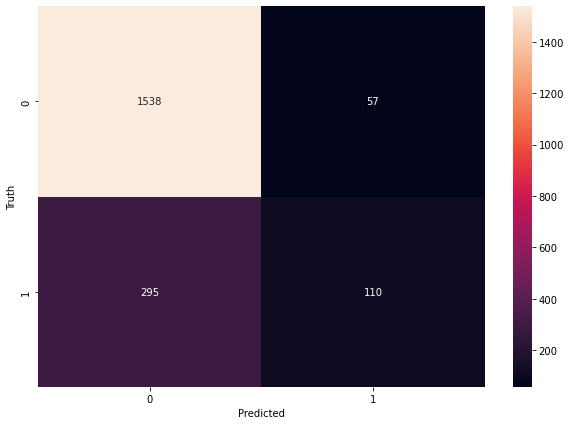

In [89]:
import seaborn as sn

#creating a confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt= "d")
plt.xlabel("Predicted")
Tplt.ylabel("Truth")

The confusion matrix shows us that  
1) when the Truth was 1, the model predicted 110 times 1
2) when the Truth was 0, the model predicted 1538 times 0

Error: 295 + 57 
1) Although the truth was 1, it predicted wrongly 295 times 0
2) when the truth was 0, the model predicted 57 times 1



In [97]:
#what is our accuracy
round((1538+110)/(1538+57+295+110),2)

0.82

In [109]:
#precision for customer who actually stayed
round(1538/(1538+296),2)

0.84

In [107]:
#precision for customer who actually churned
round(110/(110+57),2)

0.66